## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing
pd.set_option("display.max_rows", None, "display.max_columns", None)
from imblearn.over_sampling import SMOTE

## Load Dataset

In [2]:
df = pd.read_csv('C:\\Users\\krisn\\Desktop\\datamining\\breast-cancer.data', header=None)
df.columns = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']

## Pre-Processing Data

In [3]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
#Check the dimensions of dataset
print("Dimensions of dataset: ", df.shape)

Dimensions of dataset:  (286, 10)


In [5]:
#Checking how many missing values
print("Checking missing values")
df.isnull().sum()

Checking missing values


class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [6]:
#Checking unique values in dataset
print((df['class'].unique()))
print((df['age'].unique()))
print((df['menopause'].unique()))
print((df['tumor-size'].unique()))
print((df['inv-nodes'].unique()))
print((df['node-caps'].unique()))
print((df['deg-malig'].unique()))
print((df['breast'].unique()))
print((df['breast-quad'].unique()))
print((df['irradiat'].unique()))

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


In [7]:
#Count how many unknown label in attribute breast-quad
print((df['breast-quad'] == '?').sum())
#Count how many outliers data in attribute node-caps
print((df['node-caps'] == '?').sum())

1
8


In [8]:
#Drop row with unknown label attribute breast-quad
df = df[(df['breast-quad'] != '?')]
#Drop row with outlier in attribute node-caps'
df = df[(df['node-caps'] != '?')]

In [9]:
#Check all types attributes
print(df.dtypes)

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object


In [10]:
#Because many data in object type, so we need to change it into number such as integer or float
data = df.copy() 
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [11]:
# 1. Make data in attribute class, node-caps, and irradiat into biner
data['class'] = (data['class']=='recurrence-events').astype(int)
data['node-caps'] = (data['node-caps']=='yes').astype(int)
data['irradiat'] = (data['irradiat']=='yes').astype(int)

In [12]:
# 2. Make data in attribute age into average from its range
ages = {'10-19':14.5, '20-29':24.5, '30-39':34.5, '40-49':44.5,'50-59':54.5, '60-69':64.5, '70-79':74.5, '80-89':84.5, '90-99':94.5}
data = data.replace({'age':ages})

# 3. Make data in attribute node-invs into median from its range
nodes = {'0-2':1, '3-5':4, '6-8':7, '9-11':10, '12-14':13, '15-17':16, '18-20':19, '21-23':22, '24-26':25, '27-29':28, '30-32':31, '33-35':34, '36-38':37, '39': 39}
data = data.replace({'inv-nodes':nodes})

# 4. Make data in attribute tumor-size into average from its range
sizes = {'0-4':2, '5-9':7, '10-14':12, '15-19':17, '20-24':22, '25-29':27, '30-34':32, '35-39':37, '40-44':42, '45-49':47, '50-54':52, '55-59':57}
data = data.replace({'tumor-size':sizes})

In [13]:
# 5. Make data in attributes breast into number (integer)
breast = {'left':1, 'right':2}
data = data.replace({'breast':breast})

# 6. Make data in attributes menopause into number (integer)
menopause = {'premeno':1, 'ge40':2, 'lt40':3}
data = data.replace({'menopause':menopause})
data['menopause'] = data['menopause'].apply(pd.to_numeric, downcast='float', errors='coerce')

# 7. Make data in attributes breast-quad into number (integer)
quads = {'left_up':1, 'left_low':2, 'right_up':3, 'right_low':4, 'central':5}
data = data.replace({'breast-quad':quads})
data['breast-quad'] = data['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')
data[data.isnull().any(axis = 1)]
data = data.dropna()

In [14]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,1,32,1,0,3,1,2,0
1,0,44.5,1,22,1,0,2,2,3,0
2,0,44.5,1,22,1,0,2,1,2,0
3,0,64.5,2,17,1,0,2,2,1,0
4,0,44.5,1,2,1,0,2,2,4,0


In [15]:
print(data.dtypes)

class            int32
age            float64
menopause        int64
tumor-size       int64
inv-nodes        int64
node-caps        int32
deg-malig        int64
breast           int64
breast-quad      int64
irradiat         int32
dtype: object


### Data Exploration and Visualization

class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

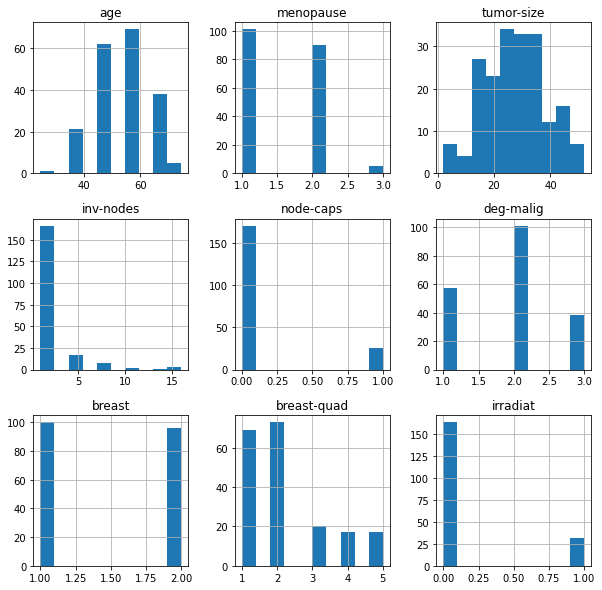

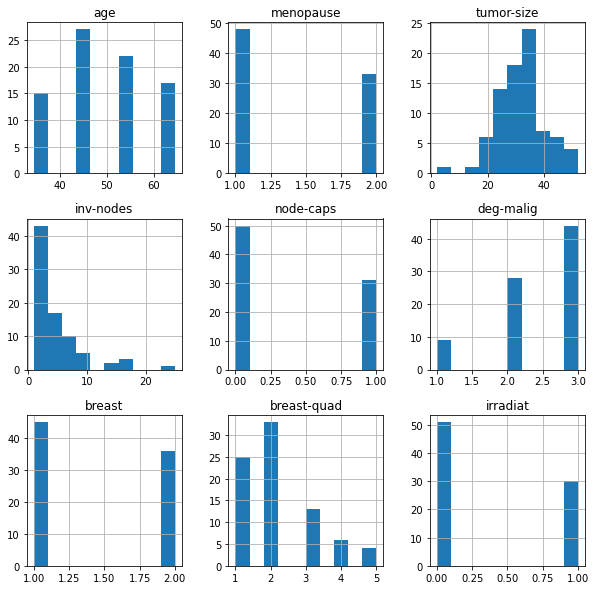

In [16]:
data.groupby('class').hist(figsize=(10,10))

### Train Data

In [17]:
#Splitting the Train Input and Output Data
#Take all the 9 features as input X and value'class' as output Y.
X = data.drop(axis=0, columns=['class'])
Y = data['class'].values

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
#Splitting into Data Training and Data Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [20]:
# sm = SMOTE(random_state=2)
# X_train, Y_train = sm.fit_sample(X_train, y_train)

In [21]:
#Importing Library for Accuracy Meassurement
from sklearn.metrics import accuracy_score

In [22]:
# #SVM
# from sklearn.svm import SVC
# svm = SVC(gamma = 'auto')
# svm.fit(X_train, y_train)
# y_pred_svm= svm.predict(X_test)
# accuracy_score(y_test,y_pred_svm)

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.7391304347826086

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight = None, min_samples_leaf = 100, random_state = 10)
clf.fit(X_train, y_train)
y_pred_clf= clf.predict(X_test)
accuracy_score(y_test,y_pred_clf)

0.6739130434782609

### Evaluation

In [25]:
def confusion_metrics (y_test,y_pred):
    #Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    #Assign True Positive, False Positive, True Negative and False Negative intu variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']
    
    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')
    #Find Precision, Recall, and F1-Score
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

In [26]:
#Evaluating for Naive Bayes
confusion_metrics(y_test,y_pred_nb)

True Negative  :  51
False Negative :  13
False Positive :  11
True Positive  :  17

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.61      0.57      0.59        30

    accuracy                           0.74        92
   macro avg       0.70      0.69      0.70        92
weighted avg       0.74      0.74      0.74        92



In [27]:
#Evaluating for Decision Tree
confusion_metrics(y_test,y_pred_clf)

True Negative  :  62
False Negative :  30
False Positive :  0
True Positive  :  0

              precision    recall  f1-score   support

           0       0.67      1.00      0.81        62
           1       0.00      0.00      0.00        30

    accuracy                           0.67        92
   macro avg       0.34      0.50      0.40        92
weighted avg       0.45      0.67      0.54        92



C:\Users\krisn\anaconda3\envs\thunderboltv2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
